# 波士顿房价预测

In [3]:
# 导入类库

import numpy as np

from numpy import arange

from matplotlib import pyplot

from pandas import read_csv

from pandas import  set_option

from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso

from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

# # 14个特征维度
CRIM：城镇人均犯罪率。

ZN：住宅用地所占比例。

INDUS：城镇中非住宅用地所占比例。

CHAS：CHAS虚拟变量，用于回归分析。

NOX：环保指数。

RM：每栋住宅的房间数。

AGE：1940年以前建成的自住单位的比例。

DIS：距离5个波士顿的就业中心的加权距离。

RAD：距离高速公路的便利指数。

TAX：每一万美元的不动产税率。

PRTATIO：城镇中的教师学生比例。

B：城镇中的黑人比例。

LSTAT：地区中有多少房东属于低收入人群。

MEDV：自住房屋房价中位数。

In [31]:
# 导入数据

filename = 'housing.data'

# names = ['城镇人均犯罪率', '住宅用地所占比例', '城镇中非住宅用地所占比例', 'CHAS虚拟变量', '环保指数',
#          '每栋住宅的房间数', '1940年以前建成的自住单位的比例', '距离5个波士顿的就业中心的加权距离',
#          '距离高速公路的便利指数', '每一万美元的不动产税率', '城镇中的教师学生比例', '城镇中的黑人比例', 
#          '地区中有多少房东属于低收入人群', '自住房屋房价中位数']
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
         'RAD', 'TAX', 'PRTATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, names=names, delim_whitespace=True)

In [32]:
print(dataset.shape)

(506, 14)


In [33]:
# 特征属性的字段类型
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PRTATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [34]:
set_option('display.width',300)
# set_option('precision',1)

print(dataset.head(30))

       CRIM    ZN  INDUS  CHAS  NOX   RM    AGE  DIS  RAD    TAX  PRTATIO      B  LSTAT  MEDV
0   6.3e-03  18.0    2.3     0  0.5  6.6   65.2  4.1    1  296.0     15.3  396.9    5.0  24.0
1   2.7e-02   0.0    7.1     0  0.5  6.4   78.9  5.0    2  242.0     17.8  396.9    9.1  21.6
2   2.7e-02   0.0    7.1     0  0.5  7.2   61.1  5.0    2  242.0     17.8  392.8    4.0  34.7
3   3.2e-02   0.0    2.2     0  0.5  7.0   45.8  6.1    3  222.0     18.7  394.6    2.9  33.4
4   6.9e-02   0.0    2.2     0  0.5  7.1   54.2  6.1    3  222.0     18.7  396.9    5.3  36.2
5   3.0e-02   0.0    2.2     0  0.5  6.4   58.7  6.1    3  222.0     18.7  394.1    5.2  28.7
6   8.8e-02  12.5    7.9     0  0.5  6.0   66.6  5.6    5  311.0     15.2  395.6   12.4  22.9
7   1.4e-01  12.5    7.9     0  0.5  6.2   96.1  6.0    5  311.0     15.2  396.9   19.1  27.1
8   2.1e-01  12.5    7.9     0  0.5  5.6  100.0  6.1    5  311.0     15.2  386.6   29.9  16.5
9   1.7e-01  12.5    7.9     0  0.5  6.0   85.9  6.6    5  3

In [35]:
set_option('precision',1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD    TAX  PRTATIO      B  LSTAT   MEDV
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0  506.0    506.0  506.0  506.0  506.0
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5  408.2     18.5  356.7   12.7   22.5
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7  168.5      2.2   91.3    7.1    9.2
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0  187.0     12.6    0.3    1.7    5.0
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0  279.0     17.4  375.4    6.9   17.0
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0  330.0     19.1  391.4   11.4   21.2
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0  666.0     20.2  396.2   17.0   25.0
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0  711.0     22.0  396.9   38.0   50.0


In [36]:
# 关联关系

set_option('precision', 2)

print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  PRTATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 

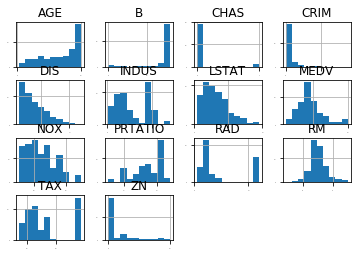

In [38]:
# 直方图

dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)

pyplot.show()

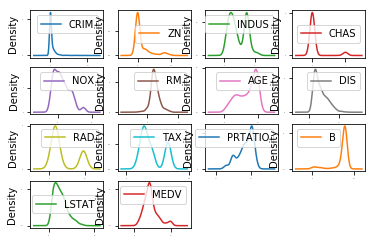

In [39]:
# 密度图

dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, fontsize=1)

pyplot.show()

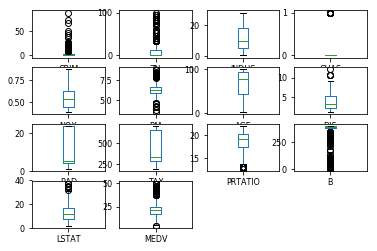

In [40]:
#箱线图

dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)

pyplot.show()

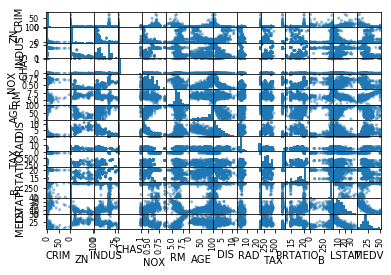

In [41]:
# 散点矩阵图

scatter_matrix(dataset)

pyplot.show()

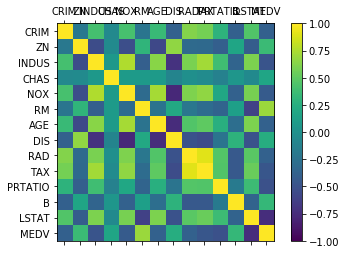

In [42]:
# 相关矩阵图

fig = pyplot.figure()

ax = fig.add_subplot(111)

cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')

fig.colorbar(cax)

ticks = np.arange(0, 14, 1)

ax.set_xticks(ticks)

ax.set_yticks(ticks)

ax.set_xticklabels(names)

ax.set_yticklabels(names)

pyplot.show()

In [43]:
# 分离数据集

array = dataset.values

X = array[:, 0:13]

Y = array[:, 13]

validation_size = 0.2

seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size=validation_size, random_state=seed)

In [44]:
# 评估算法 —— 评估标准

num_folds = 10

seed = 7

scoring = 'neg_mean_squared_error'

In [45]:
# 算法模型初始化的代码如下：

# 评估算法 - baseline

models = {}

models['LR'] = LinearRegression()

models['LASSO'] = Lasso()

models['EN'] = ElasticNet()

models['KNN']  = KNeighborsRegressor()

models['CART'] = DecisionTreeRegressor()

models['SVM'] = SVR()



In [46]:
# 评估算法

results = []

for key in models:

    kfold = KFold(n_splits=num_folds, random_state=seed)

    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)

    results.append(cv_result)

    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -21.885166 (9.637666)
SVM: -85.518342 (31.994798)


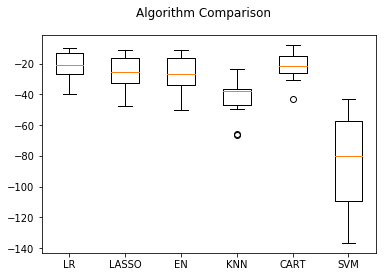

In [47]:
#评估算法——箱线图

fig = pyplot.figure()

fig.suptitle('Algorithm Comparison')

ax = fig.add_subplot(111)

pyplot.boxplot(results)

ax.set_xticklabels(models.keys())

pyplot.show()

In [48]:
# 评估算法——正态化数据

pipelines = {}

pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])

pipelines['ScalerLASSO'] = Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])

pipelines['ScalerEN'] = Pipeline([('Scaler', 

StandardScaler()), ('EN', ElasticNet())])

pipelines['ScalerKNN'] = Pipeline([('Scaler', 

StandardScaler()), ('KNN', KNeighborsRegressor())])

pipelines['ScalerCART'] = Pipeline([('Scaler', 

StandardScaler()), ('CART', DecisionTreeRegressor())])

pipelines['ScalerSVM'] = Pipeline([('Scaler', 

StandardScaler()), ('SVM', SVR())])

results = []

for key in pipelines:

    kfold = KFold(n_splits=num_folds, random_state=seed)

    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold, scoring=scoring)

    results.append(cv_result)

    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

ScalerLR: -21.379856 (9.414264)
ScalerLASSO: -26.607314 (8.978761)
ScalerEN: -27.932372 (10.587490)
ScalerKNN: -20.107620 (12.376949)
ScalerCART: -28.885114 (12.019607)
ScalerSVM: -29.633086 (17.009186)


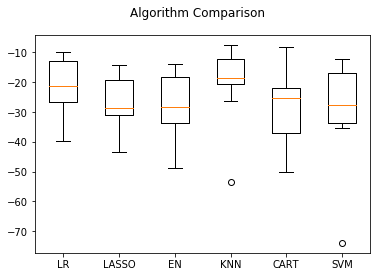

In [49]:
#评估算法——箱线图

fig = pyplot.figure()

fig.suptitle('Algorithm Comparison')

ax = fig.add_subplot(111)

pyplot.boxplot(results)

ax.set_xticklabels(models.keys())

pyplot.show()

In [51]:
# 调参改善算法——KNN

scaler = StandardScaler().fit(X_train)

rescaledX = scaler.transform(X_train)

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

model = KNeighborsRegressor()

kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, 

param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X=rescaledX, y=Y_train)



print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

cv_results = zip(grid_result.cv_results_['mean_test_score'],



grid_result.cv_results_['std_test_score'],

                 grid_result.cv_results_['params'])

for mean, std, param in cv_results:

    print('%f (%f) with %r' % (mean, std, param))

最优：-18.1721369637 使用{'n_neighbors': 3}
-20.208663 (15.029652) with {'n_neighbors': 1}
-18.172137 (12.950570) with {'n_neighbors': 3}
-20.131163 (12.203697) with {'n_neighbors': 5}
-20.575845 (12.345886) with {'n_neighbors': 7}
-20.368264 (11.621738) with {'n_neighbors': 9}
-21.009204 (11.610012) with {'n_neighbors': 11}
-21.151809 (11.943318) with {'n_neighbors': 13}
-21.557400 (11.536339) with {'n_neighbors': 15}
-22.789938 (11.566861) with {'n_neighbors': 17}
-23.871873 (11.340389) with {'n_neighbors': 19}
-24.361362 (11.914786) with {'n_neighbors': 21}


In [52]:
# 集成算法

ensembles = {}

ensembles['ScaledAB'] = Pipeline([('Scaler',

StandardScaler()), ('AB', AdaBoostRegressor())])

ensembles['ScaledAB-KNN'] = Pipeline([('Scaler', 

StandardScaler()), ('ABKNN', AdaBoostRegressor

(base_estimator= KNeighborsRegressor(n_neighbors=3)))])

ensembles['ScaledAB-LR'] = Pipeline([('Scaler', 

StandardScaler()), ('ABLR',

AdaBoostRegressor(LinearRegression()))])

ensembles['ScaledRFR'] = Pipeline([('Scaler', 

StandardScaler()), ('RFR', RandomForestRegressor())])

ensembles['ScaledETR'] = Pipeline([('Scaler', 

StandardScaler()), ('ETR', ExtraTreesRegressor())])

ensembles['ScaledGBR'] = Pipeline([('Scaler', 

StandardScaler()), ('RBR', GradientBoostingRegressor())])



results = []

for key in ensembles:

    kfold = KFold(n_splits=num_folds, random_state=seed)

    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)

    results.append(cv_result)

    print('%s: %f (%f)' % (key, cv_result.mean(), cv_result.std()))

ScaledAB: -15.648433 (6.812911)
ScaledAB-KNN: -16.280111 (10.453653)
ScaledAB-LR: -24.334101 (9.606756)
ScaledRFR: -12.463830 (5.623494)
ScaledETR: -10.249792 (5.093089)
ScaledGBR: -10.240657 (4.563757)


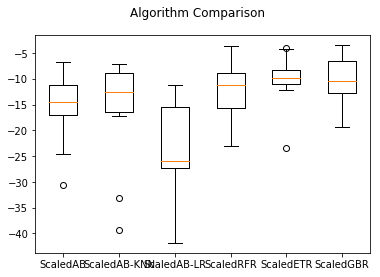

In [53]:
# 集成算法——箱线图

fig = pyplot.figure()

fig.suptitle('Algorithm Comparison')

ax = fig.add_subplot(111)

pyplot.boxplot(results)

ax.set_xticklabels(ensembles.keys())

pyplot.show()

In [69]:
# 集成算法GBM——调参

caler = StandardScaler().fit(X_train)

rescaledX = scaler.transform(X_train)

param_grid = {'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}

model = GradientBoostingRegressor()

kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, 

param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, 

grid_result.best_params_))



# 集成算法ET——调参

scaler = StandardScaler().fit(X_train)

rescaledX = scaler.transform(X_train)

param_grid = {'n_estimators': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

model = ExtraTreesRegressor()

kfold = KFold(n_splits=num_folds, random_state=seed)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优：%s 使用%s' % (grid_result.best_score_, grid_result.best_params_))

最优：-9.18509874433 使用{'n_estimators': 400}
最优：-9.16656646535 使用{'n_estimators': 50}


In [70]:
#训练模型

caler = StandardScaler().fit(X_train)

rescaledX = scaler.transform(X_train)

gbr = ExtraTreesRegressor(n_estimators=80)

gbr.fit(X=rescaledX, y=Y_train)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
# 评估算法模型

rescaledX_validation = scaler.transform(X_validation)

predictions = gbr.predict(rescaledX_validation)

print(mean_squared_error(Y_validation, predictions))

14.47359856
